In [1]:
import os
import sys
parent = os.path.abspath(os.path.join('./', os.pardir))
sys.path.insert(0, parent) # Add parent dirrectory to temporary path for imports

from matplotlib import pyplot as plt
from nbp_helper_funs import *
from itertools import product

## Explanation

In order to begin analysing the plate images, we've decided on using some basic preprocessing. We load the images in grayscale and autocrop them by binarising them with a 50% pixel intensity threshold and cutting any rows and collumns which are black.

Then, to find corners, we binarise the image again and iterate thogugh all the white pixels. The bottom-right-most pixel will then have the greatest value of it's `wi+hi`, where `wi` and `hi` are width and height indices respectivelly (remmeber that the images are indexed from top left corner). By symmetry, top-left corner will have the greatest `(w-wi)+(h-hi)` score, top-right `w+(h-hi)` and bottom-left `(w-wi)+h`. This is equivalent to taking a 45degree line and liding it across the image from each corner; then taking the first point (above threshold) it hits.

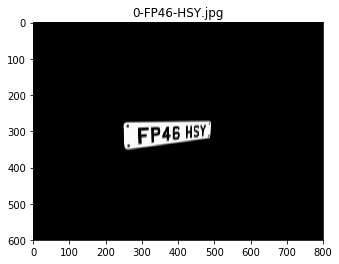

In [2]:
# Open all images in the 'hardcoded plates' directory
DIR = os.path.join(parent,'hardcoded plates')
im_dirs = list(os.path.join(DIR, file) for file in os.listdir(DIR) if file.endswith('.jpg'))
ims = list(openGrayScale(im) for im in im_dirs)

plt.imshow(pil2np(ims[0]), cmap='gray')
plt.title(os.path.split(im_dirs[0])[1])
plt.show()

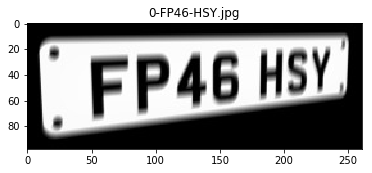

In [3]:
ims = list(cropContourImg(im, pad=10) for im in ims) # Crop images

plt.imshow(pil2np(ims[0]), cmap='gray')
plt.title(os.path.split(im_dirs[0])[1])
plt.show()

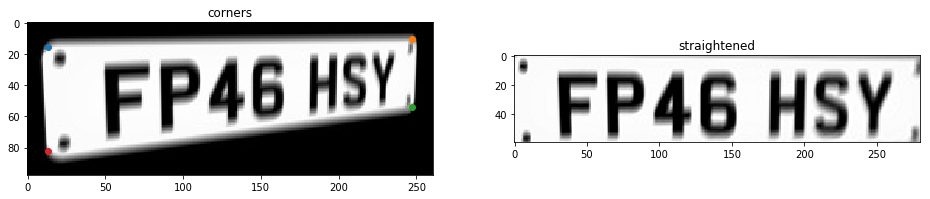

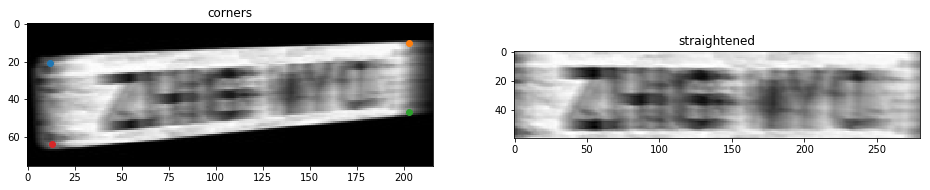

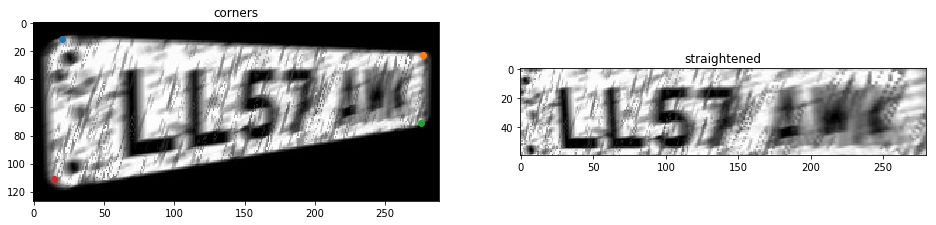

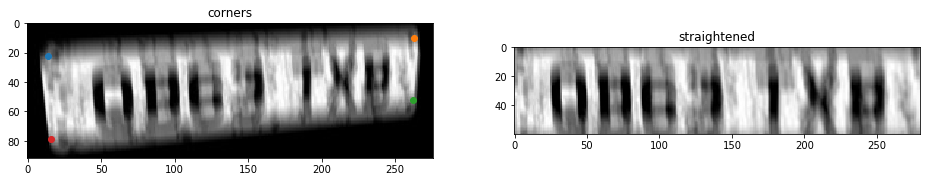

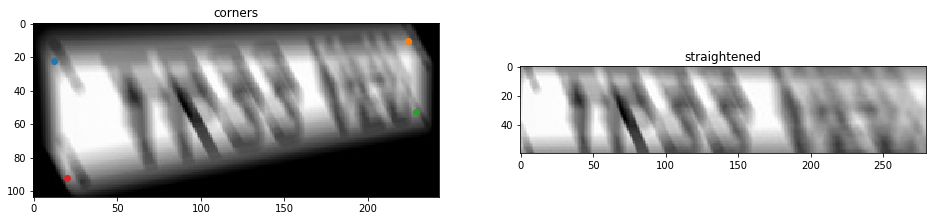

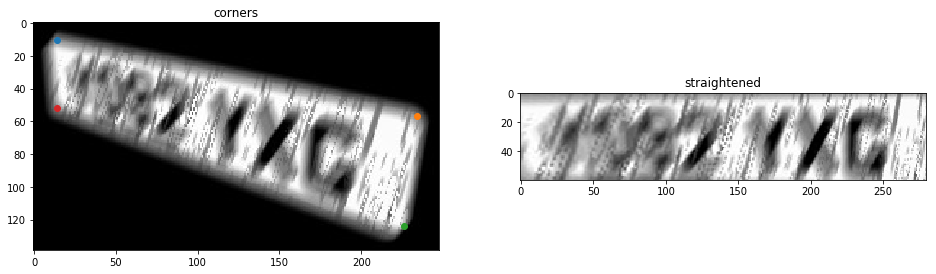

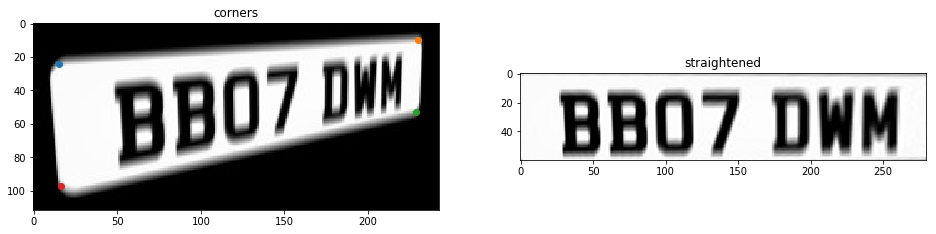

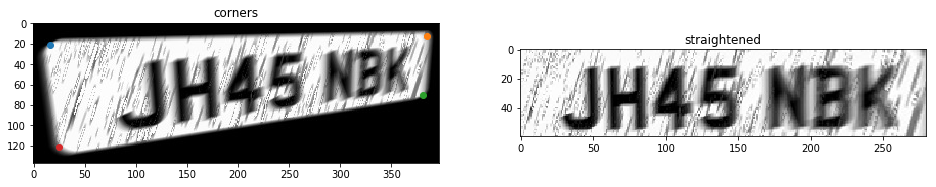

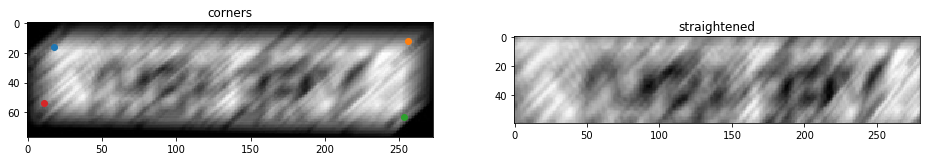

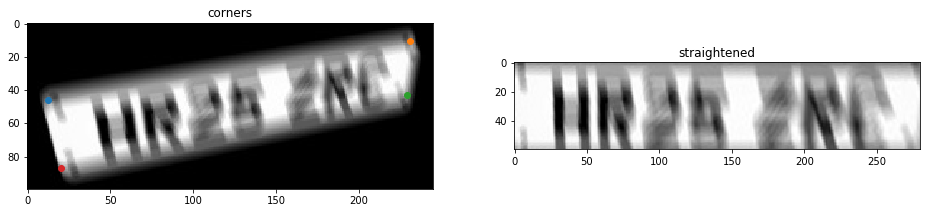

In [4]:
h, w = 60, 280
plt.rcParams["figure.figsize"] = (16,5)
for im in ims:
    # Get the corenrs of the image
    c = getCorners(im)
    
    plt.subplot(1,2,1)
    plt.imshow(pil2np(im), cmap='gray')
    for p in c: plt.plot(p[0],p[1],'o')
    plt.title('corners')

    plt.subplot(1,2,2)
    coeffs = getTransformCoeffs(c,[(0, 0), (w,0), (w,h), (0,h)])
    im_straight = im.transform((w, h), Image.PERSPECTIVE, coeffs, Image.BICUBIC)
    plt.imshow(pil2np(im_straight), cmap='gray')
    plt.title('straightened')
    plt.show()